<a href="https://colab.research.google.com/github/bulatych/ML_HSE/blob/main/homeworks/HW_3_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the 3rd and 4th seminars for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do! It is also your responsibility to test your own code.
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

<font color=#c30>**Disclaimer:**</font> it is expected that you WON'T get good metrics with this dataset. We encourage experimentation with data and models to improve the result, but a low final metric will not affect your grade.

# Tasks <font color=#c30>**[8]**</font>

### Exploratory Data Analysis <font color=#c30>**[2.5]**</font>

<font color=#c30>**[0.1]**</font> Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - These are fats present in the blood that the body uses for energy. High triglyceride levels can increase the risk of heart disease.
* APOE -  a protein involved in lipid metabolism. The APOE genotype affects blood cholesterol levels and risk of developing Alzheimer's disease and heart diseases.

* rs174548 -  one of several SNPs that lie in a linkage disequilibrium block containing the FADS1 gene was strongly associated with a number of glycerophospholipid concentrations.
* rs4775041 - it is a SNP on chromosome 15, also potentially related to lipid metabolism

You can (and should!) use this information when interpreting results.

Download the data:

In [2]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
!ls

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 26.5MB/s]
Data-Cholesterol-V2.csv  sample_data


In [6]:
import pandas as pd
df = pd.read_csv('Data-Cholesterol-V2.csv')
df.head(n=10)
# Let's calculate total number of nulls for each column

isnull = df.isnull()
isnull = isnull.sum()
isnull
# Print columns with 1 or more null value
isnull[isnull > 0]

,0
BMI,37


There are 37 observations for BMI with NaN values. Let's assume that sample size is large enough to train the model, so we will remove the lines from NaN

In [8]:
df_clean = df.dropna(subset=['BMI'])
print(df_clean.dtypes)
print(df_clean.describe())

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object
               DM         age        chol         BMI          TG        APOE  \
count  363.000000  363.000000  363.000000  363.000000  363.000000  363.000000   
mean     0.495868   54.487603  183.674931   24.954821  177.834711    3.931129   
std      0.500673   14.412883   22.219625    3.120144   87.905149    0.903153   
min      0.000000   30.000000  117.000000   19.400000   47.000000    2.000000   
25%      0.000000   42.500000  168.000000   22.650000  113.500000    4.000000   
50%      0.000000   54.000000  183.000000   24.500000  156.000000    4.000000   
75%      1.000000   67.000000  200.000000   26.750000  233.000000    4.000000   
max      1.000000   80.000000  244.000000   38.800000  671.000000    6.000000   

         rs174548   rs4775041         HTN     

Looking at the dataset variables, we can say that most of them are represented by the `int` and `float` data types. Here I have also provided summary statistics for all variables after deleting the missing values.
Categorical variables in the dataset are already represented by the numeric type int

<font color=#c30>**[0.5]**</font> Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

Assuming your data is now certainly clean, you can start looking at the features.

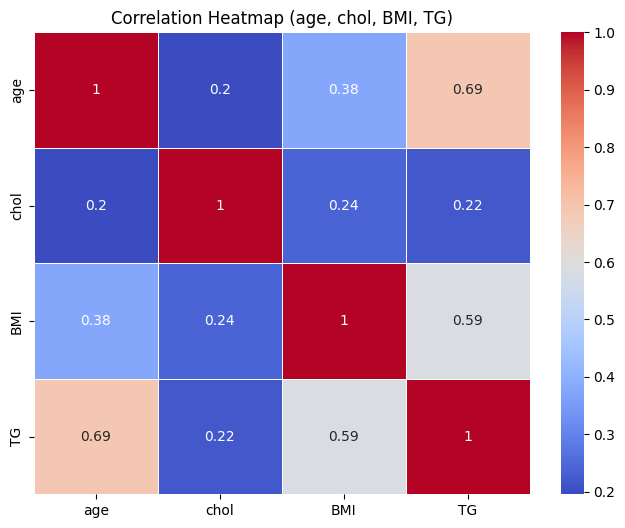

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# First look at correlations
# We select only the numeric columns
subset = df_clean[['age', 'chol', 'BMI', 'TG']]
corr_matrix_subset = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (age, chol, BMI, TG)')
plt.show()

<font color=#c30>**[1.75]**</font>
* Apply strategies you described above.
* Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.
* Explore the relationship of features and interpret it if possible.
* Deal with outliers and other dataset artifacts, if needed.


In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?
* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

### Machine Learning <font color=#c30>**[5.5]**</font>

<font color=#c30>**[0.25]**</font> Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.15]**</font> Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?
* Why do you think we don't produce scaling of One Hot encoded features?

<font color=#c30>**[0.25]**</font> Apply transformation to data, if needed. Justfy your choice.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.25]**</font> Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.1]**</font> Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

<font color=#c30>**[0.25]**</font> Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.25]**</font>
* What are residuals?
* Make a residuals vs predictions plot below.
* What do you observe?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.25]**</font> Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.25]**</font> For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[0.5]**</font> Train and optimize hyperparameters for Elastic Net, Ridge and Lasso models. Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Use test set to rank optimized models. Describe and interpret results.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Perform a feature importance analysis for all models, interpret the results, and make appropriate comparisons.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

<font color=#c30>**[1]**</font> Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?
* Would you suggest to use that model to a doctor or use it in a real study?

# Extra points <font color=#c30>**[2]**</font>

In this part, you are tasked with implementing and testing two gradient descent methods for linear regression: classical GD and it's stochastic version. First, we generate some synthetic data for you to test on. You can change the values of variables, but note that your code should work with any given values.

In [ ]:
n_features = 5
n_objects = 1500

# Generate true weights
w_true = np.random.normal(size=(n_features,))

# Generate features and target variable based on true weights
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

# Generate random initial weights
w_0 = np.random.uniform(-2, 2, (n_features))

* Implement GD and SGD for linear regression from scrath. You can reuse code from seminar.
* Implemented methods must work with any number of input features.

In [ ]:
def GD(X, y, w_0, max_iter=500, learning_rate=0.05):
    """
    Implementation of Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list, updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

def SGD(X, y, w_0, max_iter=500, batch_size=10, learning_rate=0.05):
    """
    Implementation of Stochastic Gradient Descent by scratch.

    :parameters:
    X : np.ndarray, shape (n_objects, n_features)
        Input matrix of features.
    y : np.ndarray, shape (n_features, )
        Target variable vector.
    w_0 : np.ndarray, shape (n_objects, )
        Initial weights vector.
    max_iter: int
        Maximum number of GD iterations.
    batch_size: int
        Batch size.
    learning_rate: float
        Learning rate coefficient of GD.

    :returns: list with updated weights array and MSE scores history
    """

    # YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
    return [w, mse_scores]

* Make a plot that represent how MSE changes with each step. Find out what learning rate and batch size work best for this case. Compare how quickly each method converges.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

* Do the same for cholesterol dataset. Is SGD applicable for this dataset or not?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ